In [1]:
# This cell is removed with the tag: "remove-input"
# As such, it will not be shown in documentation

from molsysmt.thirds.nglview import load_html_in_jupyter_notebook

import warnings
warnings.filterwarnings('ignore')

nglview_static_dir = '../../../../_static/nglview/user/thirds/nglview/color_by_value/'
nglview_htmlfile = None

(UserGuide_Thirds_NGLView_ColorByValue)=
# Color by value
*Coloring elements by scalar values*

[NGLView](https://github.com/nglviewer/nglview) is a very flexible and versatile tool. Just have a look to [its documentation](http://nglviewer.org/nglview/latest/), or to the wonderful [Q&A discussion in the GitHub repository](https://github.com/nglviewer/nglview/discussions). Nervertheless, and in spite of being strictly unnecessary, MolSysMT wants to contribute with some shortcuts and tools. For instance, the color of elements such as atoms, or groups, can be set in a representation according to their scalar values in a list and a color map. The function {func}`molsysmt.thirds.nglview.color_by_value` is helpful for this purpose. Let's see a couple of examples:

In [2]:
import molsysmt as msm

molecular_system = msm.convert('181L', selection='molecule_type=="protein"')

Once we have a protein, the charge of its aminoacids can be obtained with the function {func}`molsysmt.physchem.charge`:

In [3]:
charge_residues = msm.physchem.charge(molecular_system, element='group', definition='physical_pH7')

In [4]:
charge_residues

Magnitude,[0.0 0.0 0.0 0.0 -1.0 0.0 0.0 1.0 0.0 -1.0 -1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 -1.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 -1.0 0.0 -1.0 1.0 0.0 0.0 0.0 0.0 -1.0 0.0 -1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 -1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 1.0]
Units,elementary_charge


Let's make an NGLView view with a cartoon representation colored according to the amino acids charge. The first step is choosing, or making your own, matplotlib color map:

In [5]:
from matplotlib.pyplot import colormaps
blue_white_red = colormaps['bwr']

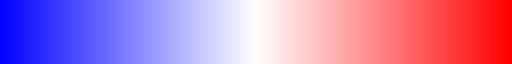

In [6]:
blue_white_red

In [7]:
print(' ')

```{admonition} Tip
:class: tip
Have a look to the Matplotlib documentation: [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and [Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html).
```

The second step is getting an NGLWidget object:

In [8]:
view = msm.view(molecular_system)
view.clear()

In [9]:
# This cell is removed with the tag: "remove-input"
# As such, it will not be shown in documentation

nglview_htmlfile = nglview_static_dir+'charge.html'

The colored representation can be then added to the view:

In [10]:
msm.thirds.nglview.color_by_value(view, charge_residues, element='group', cmap=blue_white_red, representation='cartoon')

And finally, the NGLView can be shown:

In [11]:
view

NGLWidget()

In [12]:
load_html_in_jupyter_notebook(nglview_static_dir+'charge.html')

Let's illustrate the use of {func}`molsysmt.thirds.nglview.color_by_value` with another example. This time, let's color a licorice representation with the b-factor of each atom:

In [13]:
b_factors = msm.get(molecular_system, element='atom', b_factor=True)

In [14]:
white_blue_purple = colormaps['BuPu']

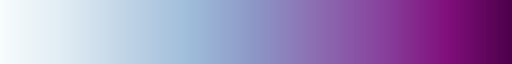

In [15]:
white_blue_purple

In [16]:
print(' ')

In [17]:
view = msm.view(molecular_system)
view.clear()
msm.thirds.nglview.color_by_value(view, b_factors, element='atom', cmap=white_blue_purple, representation='ball_and_stick',
                                 min_value=0.0, max_value=max(b_factors))
view

NGLWidget()

In [18]:
load_html_in_jupyter_notebook(nglview_static_dir+'b_factors.html')

```{admonition} See also
:class: attention
{func}`molsysmt.thirds.nglview.color_by_value`, {func}`molsysmt.basic.convert`, {func}`molsysmt.physchem.charge`, {func}`molsysmt.basic.get`, {func}`molsysmt.basic.view`
```